# Melanoma Classification : Dataset Preparation

Before going any further, this EDA is inspired by Laura Fink's notebook :

**https://www.kaggle.com/allunia/don-t-turn-into-a-smoothie-image-statistics**

I found this way highly useful for subsequent analysis where image datasets are concerned. Although, these pre-EDA `additional` dataset creation steps happen to take a lot of time. So, either you can manipulate and create your own, or you can use mine for your analysis.

The entire dataset obtained as a result of this notebook is available at :

****
### **https://www.kaggle.com/fireheart7/melanoma-image-insights** 
****

## Notebook I of III

This notebook is the I one in my series of work in this competition. As always shout out to amazing kernel authors present here at kaggle!! I got loads of inspiration from them. I believe this is the best thing about the ML community. The extent of collaboration and guidance one can seek here is inexplicable!!


## ***'Every image tells a story.'*** 

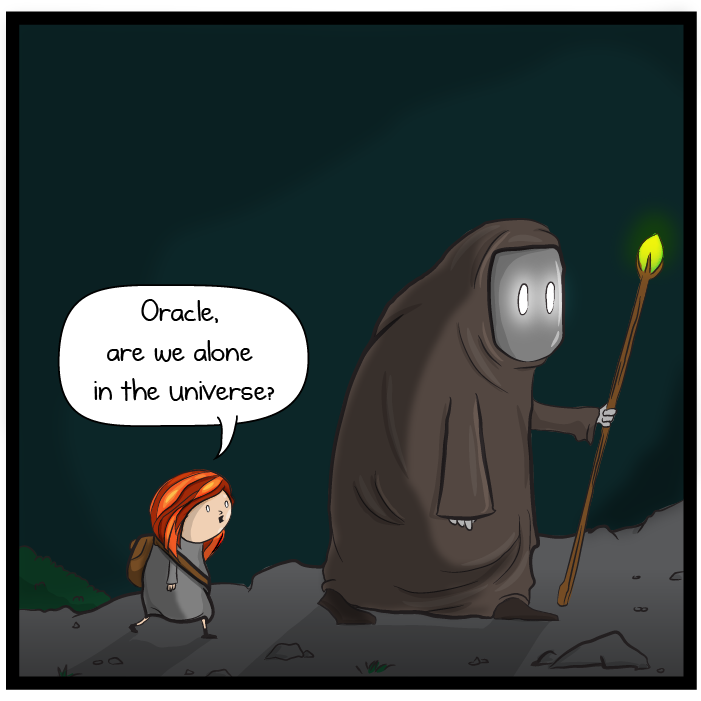 

Hence, it is of paramount importance to understand the images in our dataset! By the end of this notebook : 
* We will create several new csv files encapsulating information about our melanoma images in training as well as test set.
* Features such as Image mean, mean channel intensities, skewness, ... are incorporated in the dataframe. 
* These csv can then be used as independent additional datasets for the melanoma competition.

****
Now, time for the biggest question : 

## What's wrong with this guy ? Isn't one heavily imbalanced dataset more than sufficient to give us nightmares ?

True enough! If you had the pleasure to go through the melanoma dataset provided for this competition, you will find there are a bunch load of features given such as male/female, age, and so on.. However, features central to our images such as mean intensities, skewness, standard deviation are missing which heavily influences our analysis. So, in order to analyze them, it's better to record all the features we need(from the image) in one dataframe and store it as .csv file.

*Note : Due to time crunch and RAM constraint, I created 6 csv for training images and 2 for test. We will just merge all training ones into one during our EDA and subsequent training in this EDA_cum_preprocessing notebook :*

***https://www.kaggle.com/fireheart7/melanoma-eda-cum-preprocessing*** 

*Once again, thanks to the Kaggle community for all the inspiration!*

Here we go!!

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(dirname)

In [ ]:
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm_notebook as tqdm

This function will simply :
* Get the image names from the dataframe provided(train/test).
* Add `.jpg` extension to them.

In [ ]:
def get_image_names(dataframe) : 
    image_names = dataframe["image_name"].values
    image_names = image_names + ".jpg"
    return image_names

This is also a helper function to :
* Convert the image_names list into numpy array.
* Print mandatory information about this numpy array such as its length, type and shape.

In [ ]:
def get_info(image_names) : 
    image_names = np.array(image_names)
    
    print("Length = ", len(image_names))
    print("Type = ", type(image_names))
    print("Shape = ", image_names.shape)
    
    return image_names

Here, we will design our custom dataframe we have been bragging about since the inception of this notebook. 
* Then we will take each image name one by one from the aforementioned numpy array, load that particular image and compute the necessary statistical information.
* All this will be appended in the custom dataframe.
* In the end, `this dataframe is returned and saved as .csv file, so that we can directly import it as an external dataset`.

In [ ]:
from scipy.stats import skew

def extract_information(image_names, directory) : 
    image_statistics = pd.DataFrame(index = np.arange(len(image_names)),
                                    columns = ["image_name", "path", "rows", "columns", "channels", 
                                              "image_mean", "image_standard_deviation", "image_skewness",
                                              "mean_red_value", "mean_green_value", "mean_blue_value"])
    i = 0 
    for name in tqdm(image_names) : 
        path = os.path.join(directory, name)
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        image_statistics.iloc[i]["image_name"] = name
        image_statistics.iloc[i]["path"] = path
        image_statistics.iloc[i]["rows"] = image.shape[0]
        image_statistics.iloc[i]["columns"] = image.shape[1]
        image_statistics.iloc[i]["channels"] = image.shape[2]
        image_statistics.iloc[i]["image_mean"] = np.mean(image.flatten())
        image_statistics.iloc[i]["image_standard_deviation"] = np.std(image.flatten())
        image_statistics.iloc[i]["image_skewness"] = skew(image.flatten())
        image_statistics.iloc[i]["mean_red_value"] = np.mean(image[:,:,0])
        image_statistics.iloc[i]["mean_green_value"] = np.mean(image[:,:,1])
        image_statistics.iloc[i]["mean_blue_value"] = np.mean(image[:,:,2])
        
        i = i + 1
        del image
        
    return image_statistics

Use the above function to create train and test image statistics file. Rest is pretty much intuitive :-)

In [ ]:
train_dir = "/kaggle/input/siim-isic-melanoma-classification/jpeg/train/"
train = pd.DataFrame(pd.read_csv("/kaggle/input/siim-isic-melanoma-classification/train.csv"))
train.head()

In [ ]:
image_names = get_image_names(train)
image_names = get_info(image_names)

Uncomment these!! I have saved several csv files, each having information on about 5000 images.

In [ ]:
#image_statistics = extract_information(image_names[0:5000], train_dir) # repeat this for image_names[5000:10k], image_names[10k-15k]...so on till 33126
#image_statistics.to_csv("melanoma_image_statistics_compiled_01", index = False)# save each one. I have computed it all beforehand, so wrote only one for instance.   

In [ ]:
test_dir = "/kaggle/input/siim-isic-melanoma-classification/jpeg/test/"
test = pd.DataFrame(pd.read_csv("/kaggle/input/siim-isic-melanoma-classification/test.csv"))
test.head()

In [ ]:
image_names = get_image_names(test)
image_names = get_info(image_names)

Uncomment these!

In [ ]:
#image_statistics = extract_information(image_names[5000:10982], test_dir)
#image_statistics.to_csv("melanoma_image_statistics_compiled_test_02", index = False)   

You may not need to run it as its heavily time taking.

The entire dataset obtained as a result of this notebook is available at :

****
### **https://www.kaggle.com/fireheart7/melanoma-image-insights** 
****

Do upvote it if you find it useful!!

### **Now, all these csv files will be used as an external dataset in further EDA and preprocessing. The link to that notebook is given here :**

LINK WILL BE UPDATED BY TOMORROW

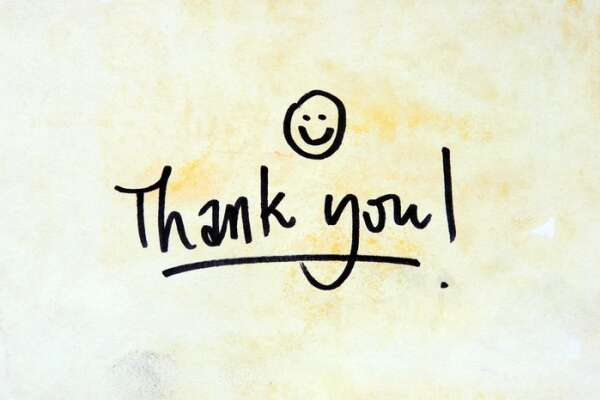 
